# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
##### In this project, I will be analyzing the TMDb movie data set. This data set shows the name of the movies, their genres, budget, profit that they made, the companies that produced those movies, and the year it was released. Through my analysis, I will try to find out trends and answer some questions like:
- Which genres are more popular
- Which genres are more profitable
- Which company make the most profit
- Which movies are the most popular
- Which movies are the most profitable
- What are the profit trend of movies from year to year
- What kinds of properties are associated with movies that have high revenues

##### Importing needed libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
##### Reading TMDb movies file

In [33]:
df = pd.read_csv('tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Assessing data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.duplicated().sum()

1

### In the assessment above I found out the following:
#### Quality issues:
- The values in the production_companies and genres columns are separated by | character
- Some data are missing
- There is one duplicate
- Some columns are unnecessary 

### Data Cleaning
##### Removing the unnecessary columns

In [6]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget', 'revenue'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


##### Removing duplicates and the missing values

In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   int64  
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   vote_count            9772 non-null   int64  
 8   vote_average          9772 non-null   float64
 9   release_year          9772 non-null   int64  
 10  budget_adj            9772 non-null   float64
 11  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 992.5+ KB


##### Removing | character from the genres column

In [8]:
genre_clean = df.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)
genre_clean

,Science Fiction,Adventure,Action,Thriller,Fantasy,Crime,Drama,Western,Animation,Family,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10862,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10864,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Combining the genres into one table by counting the number of each genre and creating a data frame for it

In [9]:
# counting code
genre_count = genre_clean.sum(axis = 0)
# data frame code
genre_df = pd.DataFrame(genre_count, columns=['count'])
genre_df['genre'] = genre_df.index
genre_df

,count,genre
Science Fiction,1136.0,Science Fiction
Adventure,1384.0,Adventure
Action,2235.0,Action
Thriller,2746.0,Thriller
Fantasy,840.0,Fantasy
Crime,1299.0,Crime
Drama,4364.0,Drama
Western,160.0,Western
Animation,617.0,Animation
Family,1095.0,Family


##### Removing | character from the production_companies column

In [10]:
companies_cleaned = df.production_companies.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)
companies_cleaned

,Legendary Pictures,Universal Studios,Fuji Television Network,Amblin Entertainment,Dentsu,Village Roadshow Pictures,Kennedy Miller Productions,NeoReel,Red Wagon Entertainment,Mandeville Films,...,Protelco,Planet Film Productions,High Road,Eden Productions Inc.,Embassy Pictures,John Frankenheimer Productions Inc.,Bruce Brown Films,Douglas & Lewis Productions,Benedict Pictures Corp.,Norm-Iris
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Which genres are more popular)

##### First creating a list

In [11]:
genres = list(genre_df.genre)

##### Using the matrix method to calculate the popularity for each genre

In [12]:
popularity_calculation = np.matrix(df.popularity) * np.matrix(genre_clean)

##### Creating popularity list

In [13]:
genre_popularity_calculation_list = popularity_calculation.tolist()[0]

##### Creating a data frame for genre and popularity

In [14]:
genre_popularity = pd.DataFrame({'genre': genres,
                           'popularity': genre_popularity_calculation_list})
genre_popularity

,genre,popularity
0,Science Fiction,1210.155764
1,Adventure,1673.329036
2,Action,2164.052715
3,Thriller,2120.385441
4,Fantasy,887.300733
5,Crime,996.770934
6,Drama,2731.333255
7,Western,96.728674
8,Animation,564.111643
9,Family,926.881471


##### Creating a bar chart to demonstrate the popularity of each genre

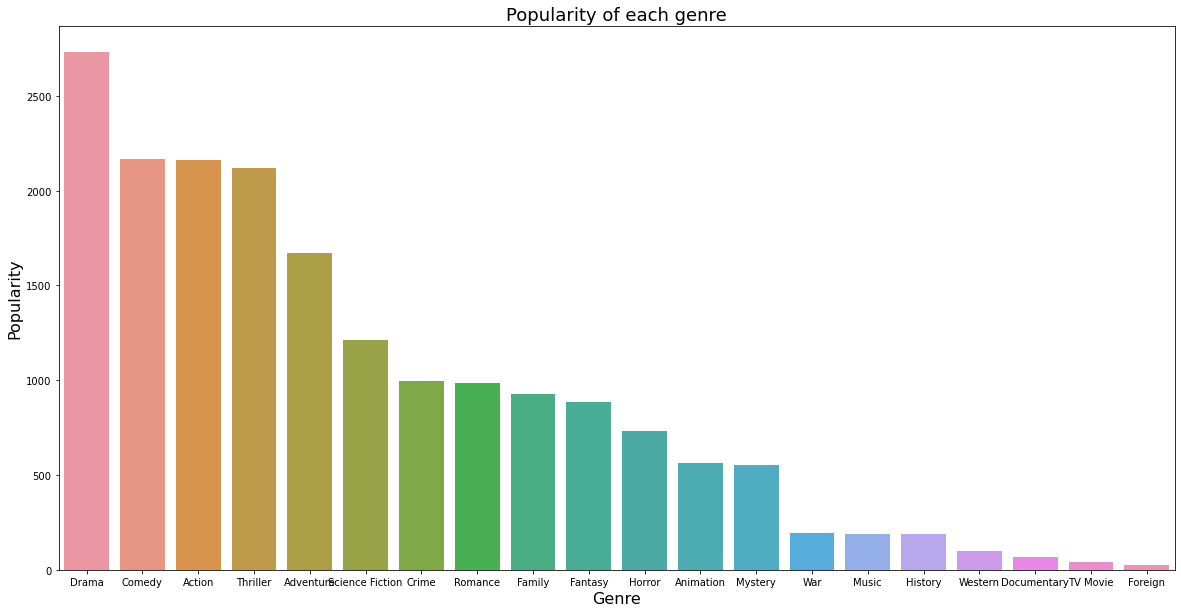

In [15]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_popularity.sort_values(by='popularity', ascending=False), x='genre', y='popularity')
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Popularity', fontsize=16)
plt.title('Popularity of each genre', fontsize=18);

- It looks like Drama is the most liked genre by the audience.

### Research Question 2  (Which genres are more profitable)

##### Using the matrix method to calculate the revenue for each genre and creating revenue list

In [16]:
revenue_calculation = np.matrix(df.revenue_adj) * np.matrix(genre_clean)
genre_revenue_calculation_list = revenue_calculation.tolist()[0]

##### Creating a data frame for genre and revenue

In [17]:
genre_revenue = pd.DataFrame({'genre': genres,
                              'revenue': genre_revenue_calculation_list})
genre_revenue

,genre,revenue
0,Science Fiction,1.068414e+11
1,Adventure,2.082414e+11
2,Action,2.186066e+11
3,Thriller,1.605913e+11
4,Fantasy,1.018289e+11
5,Crime,7.667539e+10
6,Drama,1.921169e+11
7,Western,7.606709e+09
8,Animation,5.953321e+10
9,Family,1.078018e+11


##### Creating a bar chart to demonstrate the profitability of each genre

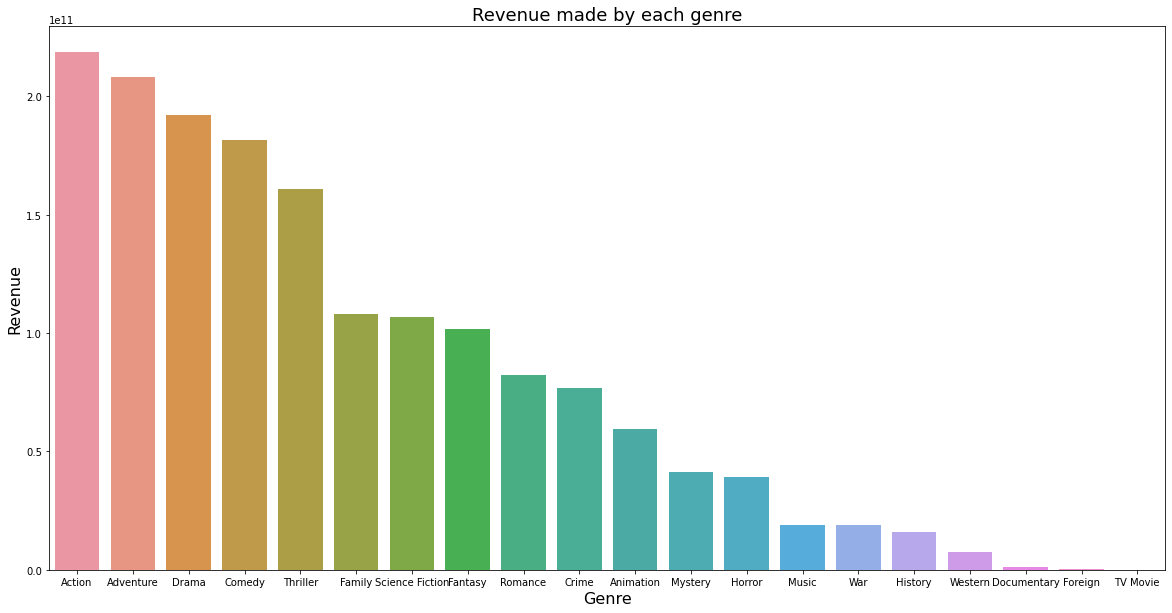

In [18]:
plt.figure(figsize=[20,10])
sns.barplot(data=genre_revenue.sort_values(by='revenue', ascending=False), x='genre', y='revenue')
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Revenue', fontsize=16)
plt.title('Revenue made by each genre', fontsize=18);

- Although that Drama is the most popular genre, it looks like Action has more profit which means also that it is watched more by the audience.

### Research Question 3 (Which company make the most profit)

##### Because there were a lot of companies I only took the companies which produced more than 100 movies

##### Extracting the desired companies

In [19]:
top_companies = companies_cleaned.sum()[companies_cleaned.sum()>100].index.tolist()

##### Calling the data

In [20]:
companies = companies_cleaned[top_companies]

##### Using the matrix method to calculate the revenue for each company and creating a list

In [21]:
companies_revenue_calculation = np.matrix(df.revenue_adj) * np.matrix(companies)
companies_revenue_calculation_list = companies_revenue_calculation.tolist()[0]

##### Creating a data frame for companies and revenue

In [22]:
top_companies_profit = pd.DataFrame({'companies': top_companies,
                                     'revenue': companies_revenue_calculation_list})

##### Creating a bar chart to demonstrate the wich companey made the most profit

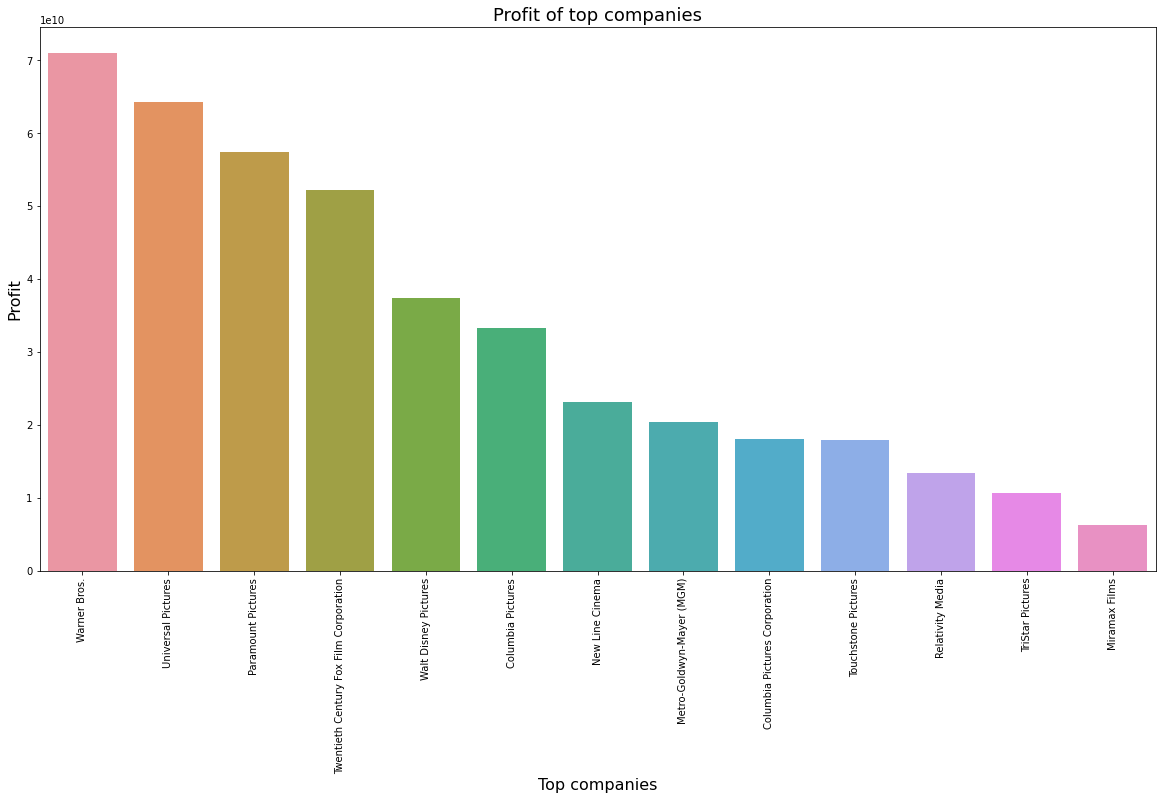

In [23]:
plt.figure(figsize=[20,10])
sns.barplot(data=top_companies_profit.sort_values(by='revenue', ascending=False)[0:15], x='companies', y='revenue')
plt.xticks(rotation=90)
plt.xlabel('Top companies', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.title('Profit of top companies', fontsize=18);

- Warner Bros made the highest profit

### Research Question 4 (Which movies are the most popular)

##### Creating a bar chart to demonstrate which movies are the most popular

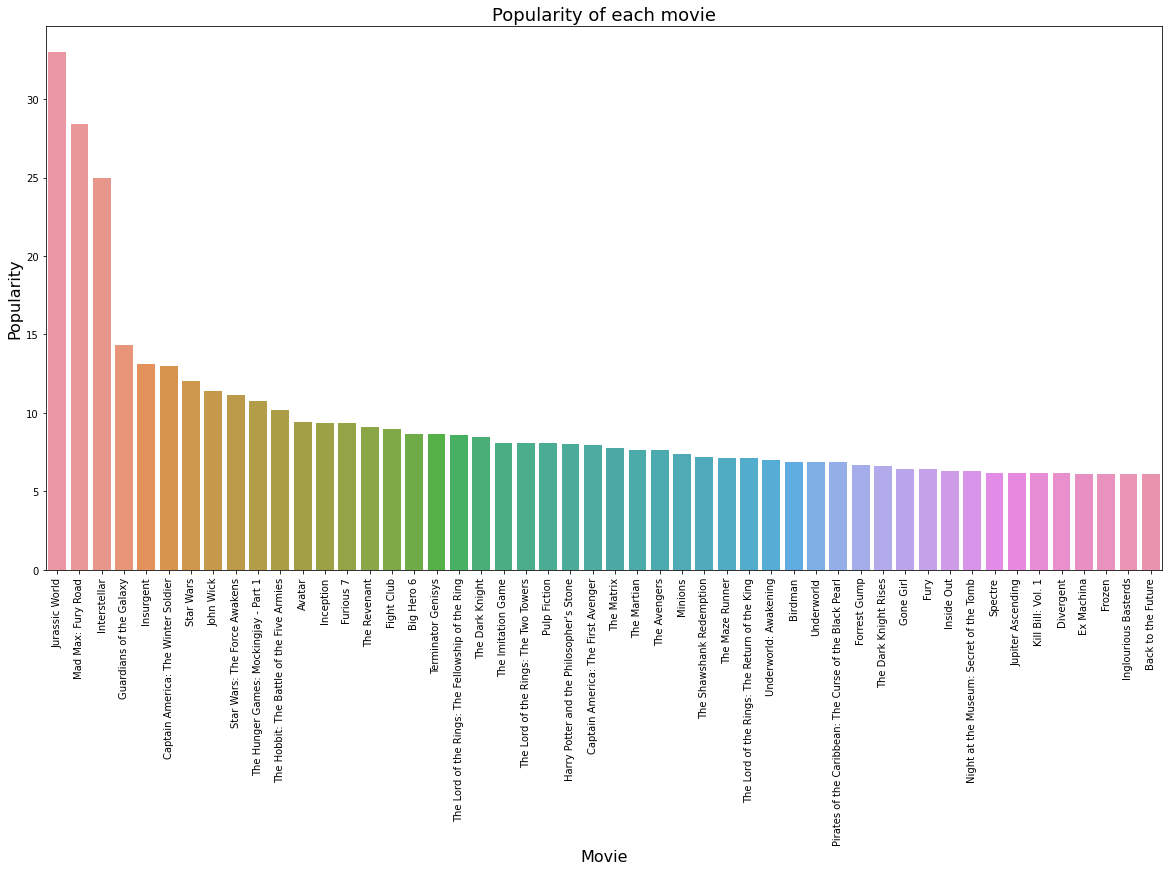

In [24]:
# calling the needed data
most_popular_movie = df[['original_title', 'popularity']]
# bar chart code
plt.figure(figsize=[20,10])
sns.barplot(data=most_popular_movie.sort_values(by='popularity', ascending=False)[0:50], x='original_title', y='popularity')
plt.xticks(rotation=90)
plt.xlabel('Movie', fontsize=16)
plt.ylabel('Popularity', fontsize=16)
plt.title('Popularity of each movie', fontsize=18);

- Jurassic World has the most popularity between all movies.

### Research Question 4 (Which movies are the most profitable)

##### Creating a bar chart to demonstrate the wich movies are the most profitable

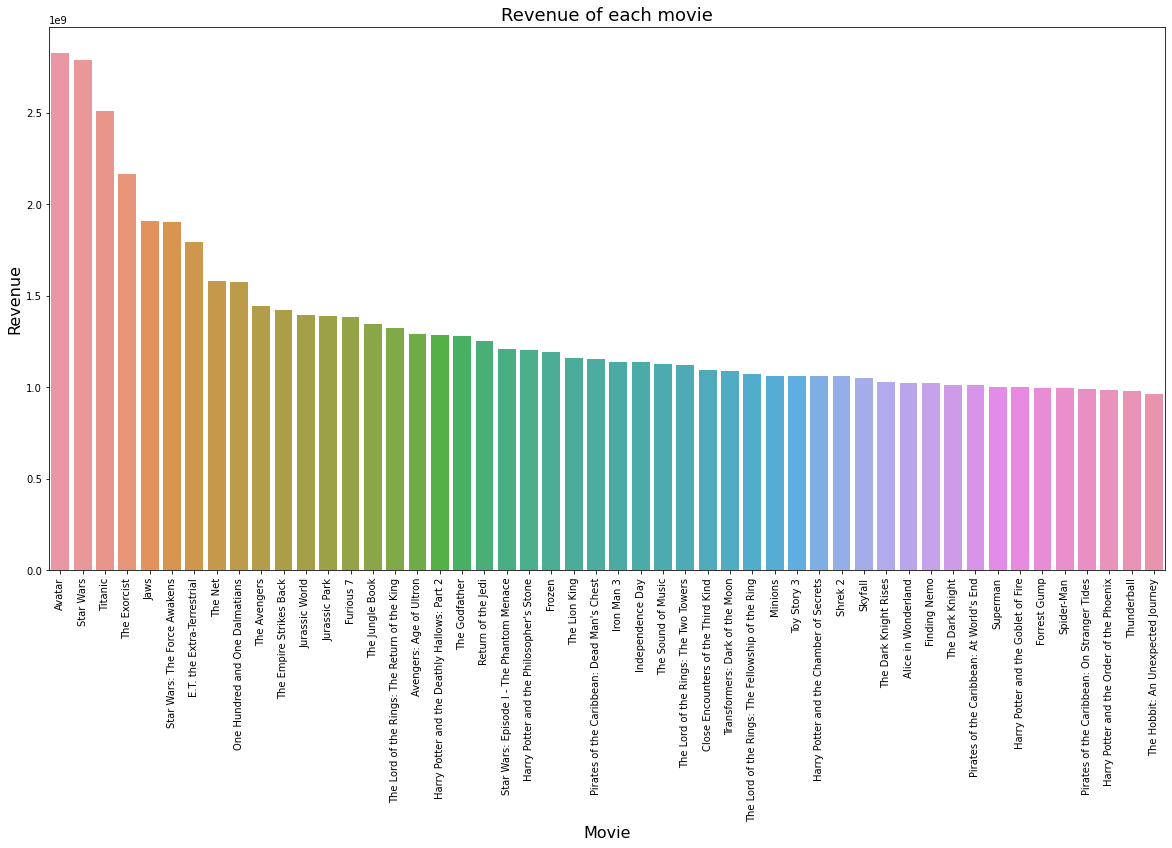

In [25]:
# calling the data needed
most_profitable_movie = df[['original_title', 'revenue_adj']]
# bar chart code
plt.figure(figsize=[20,10])
sns.barplot(data=most_profitable_movie.sort_values(by='revenue_adj', ascending=False)[0:50], x='original_title', y='revenue_adj')
plt.xticks(rotation=90)
plt.xlabel('Movie', fontsize=16)
plt.ylabel('Revenue', fontsize=16)
plt.title('Revenue of each movie', fontsize=18);

- Avatar made the highest profit which also means its has the highest view rates.

### Research Question 5 (What are the profit trend of movies from year to year)

##### Creating a new column that calculates the difference between the revenue and the budget

In [26]:
df['profit_or_loss_ammount'] = df['revenue_adj'] - df['budget_adj']

##### Creting a line gragh to show the trend

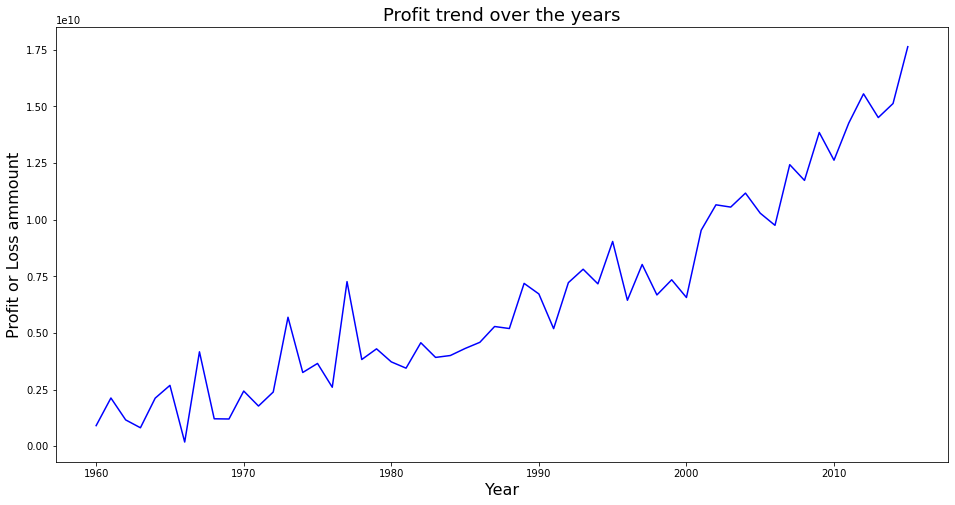

In [27]:
df.groupby('release_year')['profit_or_loss_ammount'].sum().plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Profit or Loss ammount', fontsize=16)
plt.title('Profit trend over the years', fontsize=18);

- The gragh shows that there is an increase in profit through time.

### Research Question 6 (What kinds of properties are associated with movies that have high revenues)

##### This polt shows the relation between the votes and the revenue

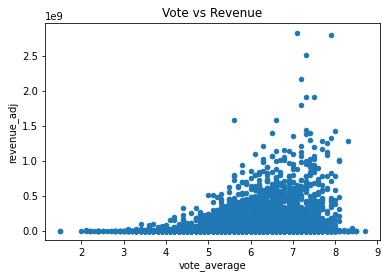

In [28]:
df.plot(x='vote_average',y='revenue_adj',kind='scatter')
plt.title('Vote vs Revenue')
plt.show()

- The scatter plot shows that there is a positive correlation between the votes and the revenue.

##### This polt shows the relation between the runtime and the revenue

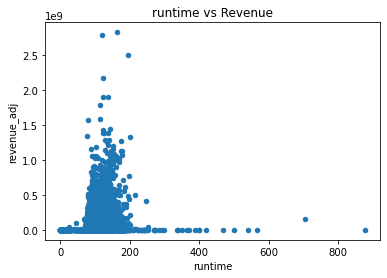

In [29]:
df.plot(x='runtime',y='revenue_adj',kind='scatter')
plt.title('runtime vs Revenue')
plt.show()

- The scatter plot shows that there is a negative correlation between the runtime and the revenue.

##### This polt shows the relation between the release year and the revenue

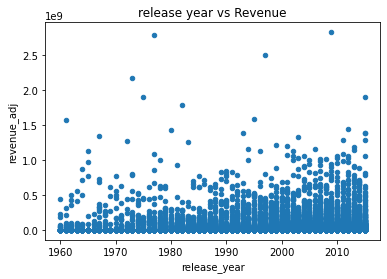

In [31]:
df.plot(x='release_year',y='revenue_adj',kind='scatter')
plt.title('release year vs Revenue')
plt.show()

- The scatter plot shows that there is a positive correlation between the release year and the revenue.

<a id='conclusions'></a>
## Conclusions
##### As demonstrated from the questions and the analysis above I arrived at the following conclusions:
- Drama is the most liked genre that comes on first then Comedy, Action, Thriller with a very small difference between them.
- Although Drama came up first as the most liked genre. Action has the highest revenue then comes Adventure and Drama in third place. Which indicates that Action has the highest view rates.
- The movie industry has a massive amount of production companies, so to be able to find out which were the most profitable ones I had in my analysis only the companies that have more than 100 movies. The most profitable one was Warner Bros, and then came respectively Universal Pictures, Paramount Pictures, 20th Century Fox, Walt Disney Pictures, Columbia Pictures, New Line Cinema, Metro Goldwyn Mayer. It is expected that these companies would come at the top for they are the leading filmmakers, and they know what is popular with the audience.
- The most popular movie was Jurassic World, then came Mad Max Fury Road, then Interstellar. There is a big difference between the first three movies and the rest of the list.
- The most profitable movie was Avatar, the came Star Wars, then Titanic. It also shows that they have the highest view rates.
- I found out that profit increases through the years. Which shows that the film making industry is growing.
- I found out that the more votes the movie gets the highest the revenue, also if the movie runtime is no more than 200 and not very short the highest the revenue it gets. And also with time the profit increases, maybe because more movies were made and technology is better. 